#[PyTorch Tutorial](https://pytorch.org/tutorials/index.html)

In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

## 1. Load and normalizing the datasets using torchvision

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [8]:
transform_train = transforms.Compose([
    #########################################
    #
    #
    #               your code
    #
    # Flip
    # Translation
    # Rotation
    # Crop
    # Resize
    # Lighting (ColorJitter)
    #
    # Please See, https://pytorch.org/vision/stable/transforms.html?highlight=transform
    #
    # CIFAR-10 input size : (3 x 32 x 32)
    # Desired Model input size : (3 x 32 x 32)
    # 
    # The size after transformation must be (3 x 32 x 32)
    #
    # In case Crop, giving some padding is useful. (can be implemented in one line)
    # In case Resize, cropping after resizing is needed. (can be implemented in one line)
    #
    #
    #########################################
    #                 MY CODE               
    #transforms.RandomVerticalFlip(),
    #transforms.RandomAffine(degrees=(30,70)),
    #transforms.RandomRotation(degrees=(0,100)),
    #transforms.RandomCrop(size=(32,32)),
    #transforms.Resize(size=(32,32)),
    #transforms.ColorJitter(brightness=0.5, contrast=0.3, hue=0.3),
    #########################################
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=512,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


## 2. Define LeNet-5
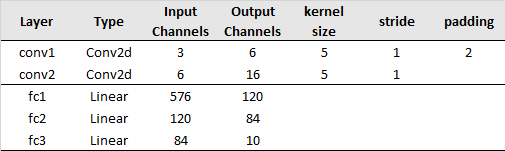

In [9]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

    #########################################
    #
    #
    #               your code
    #
    # self.conv1 = ... 
    # self.conv2 = ...
    # self.fc1 = ...
    # self.fc2 = ...
    # self.fc3 = ...
    #
    #########################################
    #                                       
    #                  MY CODE              
        self.conv1 = nn.Conv2d(3,6,kernel_size=5,stride=1,padding=2)
        self.conv2 = nn.Conv2d(6,16,kernel_size=5,stride=1)
        self.fc1 = nn.Linear(576,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    #########################################

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        # ? x 3 x 16 x 16
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        # ? x 16 x 6 x 6
        x = x.view(x.size(0), -1)
        # ? x 576
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [10]:
net = LeNet5()
net = net.cuda()

## 3. Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

## 4. Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [12]:
import time

epochs = 25

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    start = time.time()

    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # print statistics
        running_loss += loss.item()

    end = time.time()
    print('(Train) [epoch : %d] loss: %.3f / time: %.3f / acc@1: %.3f' %
          (epoch + 1, running_loss / len(trainloader), (end-start), 100 * correct / total))
        
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('(Test) Accuracy of the network on the 10000 test images: %.3f %%\n' % (
        100 * correct / total))

print('Finished Training')

(Train) [epoch : 1] loss: 2.195 / time: 9.357 / acc@1: 19.538
(Test) Accuracy of the network on the 10000 test images: 27.870 %

(Train) [epoch : 2] loss: 1.831 / time: 9.294 / acc@1: 33.920
(Test) Accuracy of the network on the 10000 test images: 37.210 %

(Train) [epoch : 3] loss: 1.601 / time: 9.184 / acc@1: 41.872
(Test) Accuracy of the network on the 10000 test images: 44.460 %

(Train) [epoch : 4] loss: 1.460 / time: 9.368 / acc@1: 47.254
(Test) Accuracy of the network on the 10000 test images: 49.180 %

(Train) [epoch : 5] loss: 1.347 / time: 9.727 / acc@1: 51.246
(Test) Accuracy of the network on the 10000 test images: 52.510 %

(Train) [epoch : 6] loss: 1.276 / time: 9.330 / acc@1: 54.212
(Test) Accuracy of the network on the 10000 test images: 54.310 %

(Train) [epoch : 7] loss: 1.204 / time: 9.338 / acc@1: 56.994
(Test) Accuracy of the network on the 10000 test images: 56.970 %

(Train) [epoch : 8] loss: 1.140 / time: 9.333 / acc@1: 59.518
(Test) Accuracy of the network on t